In [1]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Script for initial analysis of ISSM output
# Mikayla Pascual 07/15/22
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#import 
from MatlabFuncs import *
from model import *
from triangle import *
from bamg import bamg
from savevars import *
import plotdoc
from loadmodel import *
from os.path import exists

from scipy.io import loadmat
from m1qn3inversion import *
import numpy as np
from ContourToNodes import *
from solve import *

import lhsmdu #install in terminal 'pip install lhsmdu'
import matplotlib.pyplot as plt
import numpy as np
import pickle

could not import shapefile, PyShp has not been installed, no shapefile reading capabilities enabled


In [2]:
md = loadmodel("./Models/SAtoES_relaxation.nc")

Opening ./Models/SAtoES_relaxation.nc for reading 
solidearthsettings.solidearthsettings
lovenumbers.lovenumbers
rotational.rotational
results.results
results.solutionstep
empty init
WARNING, StressbalanceConvergenceNumSteps is not present on every times, we chose DimNum10(1) as the dimension to write it with


In [3]:
md.results.TransientSolution

  1x26 struct array with fields:

    StressbalanceConvergenceNumSteps
    time
    Vx
    Vy
    Vel
    Pressure
    Thickness
    Surface
    Base
    MaskOceanLevelset
    SmbMassBalance
    IceVolumeAboveFloatation
    SolutionType

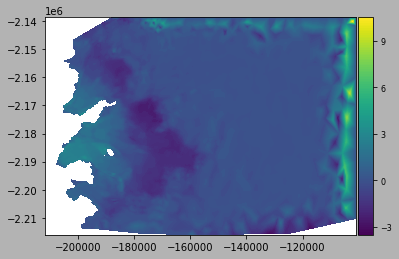

In [53]:
# Changes in ice thickness
thickness_change = md.results.TransientSolution[25].Thickness - md.results.TransientSolution[24].Thickness
import matplotlib as mpl
cmap = mpl.cm.get_cmap('RdBu')
plotmodel(md, 'data', thickness_change, 'mask#all', md.mask.ice_levelset<=0)
# for masking: 'mask#all', md.mask.ice_levelset<=0

In [58]:
md.transient
md.frontalforcings
md.calving

   Calving parameters:         calvingrate            : (12112,)        -- calving rate at given location [m/a]

TypeError: 'cmap' must be an instance of matplotlib.colors.Colormap or None, not a str

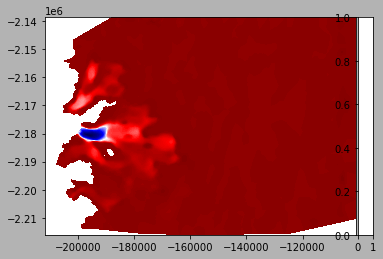

In [12]:
# Changes in ice velocity
ice_vel_change = md.results.TransientSolution[25].Vel - md.results.TransientSolution[0].Vel
plotmodel(md, 'data', ice_vel_change, 'mask#all', md.mask.ice_levelset<=0, 'colormap', 'seismic')

Text(0, 0.5, 'ice volume (m$^3$)')

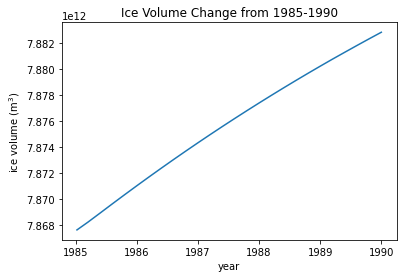

In [67]:
# Changes in ice volume
#ice_vol_change = md.results.TransientSolution[25].IceVolumeAboveFloatation - md.results.TransientSolution[0].IceVolumeAboveFloatation
#plt.plot(md.results.TransientSolution.IceVolumeAboveFloatation)
# make time array (1985 to present (?))
time = np.array([1985.02,1985.2,1985.4,1985.6,1985.8,1986, 1986.2,1986.4,1986.6,1986.8,1987,
                 1987.2,1987.4,1987.6,1987.8,1988,1988.2,1988.4,1988.6,1988.8,1989,
                1989.2,1989.4,1989.6,1989.8, 1990])
ice_vol_change = np.array([7.8676556e+12,7.86825504e+12,7.8689574e+12,7.86966533e+12,7.87036407e+12,
                          7.87105409e+12,7.87173458e+12,7.87240519e+12,7.87306584e+12,7.87371668e+12,
                          7.87435773e+12,7.8749889e+12,7.87561031e+12,7.87622206e+12,7.87682442e+12,
                          7.8774174e+12,7.87800117e+12,7.87857584e+12,7.8791415e+12,7.87969828e+12,
                          7.88024634e+12,7.8807858e+12,7.88131248e+12,7.88183519e+12,7.88234977e+12,
                          7.88285627e+12])

plt.plot(time,ice_vol_change)
plt.title('Ice Volume Change from 1985-1990')
plt.xlabel('year')
plt.ylabel('ice volume (m$^3$)')

In [16]:
from plotdoc import plotdoc
plotdoc()

   Plot usage:  plotmodel(model, varargin)
   plotting is done with couples of keywords values, the type and style of data to display is given by one (or several) of the followings
   Options:  
     'data' :  and a model field or one of the following options.
 - quiver :   quiver plot give data and a vector array [Vx, Vy]
 - mesh :   draw mesh using trisurf
 - BC :   this will draw all the boundary conditions (Dirichlet and Neumann).
 - elementnumbering :   numbering of elements (matlab indices)
 - 3D disclaimer :  3D is implemented with plot3d for now this is not optimal and may change to mayavi at some point. The impelementation is on the development side for now so expect some issue and question your plotting before you results.

   The general look of the plot is then given by the following keywords
 - alpha :   set transparency of plotted data (in [0, 1]) 
 - axes_pad :   spacing between axes (default is 0.25)
 - axis :   show ('on') or hide ('off') axes
 - backgroundcolor :   pl